In [1]:
from __future__ import absolute_import, division, print_function
import sys
print(sys.version)


import tensorflow as tf
import tensorflow.keras as keras

import numpy as np 
import matplotlib.pyplot as plt

from PIL import Image

print(tf.__version__)

print ("ALL IMPORTED")

3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 23:09:28) [MSC v.1916 64 bit (AMD64)]
1.13.1


In [2]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()


print(len(test_images))
print(len(test_labels))
print(train_images.shape)
print(train_labels.shape)



10000
10000
(60000, 28, 28)
(60000,)


In [3]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images /255.0
test_images = test_images / 255.0

3


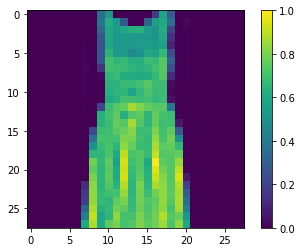

In [4]:
nb = 332

im = train_images[nb]
plt.figure()
plt.imshow(im)
plt.colorbar()
print(train_labels[nb])

In [5]:
layers = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(128, activation = tf.nn.relu),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)
]

theReseau = keras.Sequential(layers)



Instructions for updating:
Colocations handled automatically by placer.


In [6]:
theReseau.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
theReseau.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2502 - acc: 0.9061
Epoch 2/8
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2418 - acc: 0.9101
Epoch 3/8
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2331 - acc: 0.9119
Epoch 4/8
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2230 - acc: 0.9163
Epoch 5/8
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2181 - acc: 0.9176
Epoch 6/8
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2112 - acc: 0.9206
Epoch 7/8
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2028 - acc: 0.9240
Epoch 8/8
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1982 - acc: 0.9254


In [26]:
loss, acc  = theReseau.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3344 - acc: 0.8805


In [73]:
data = Image.open("shoes.jpg")
#data = Image.open("pants.jpeg")

data = data.resize((28,28),0)
shoes  = data.convert("L")
mat = np.asarray(shoes)
print(mat.shape)
mat = (np.expand_dims(mat,0))

print(mat.shape)

predictions = theReseau.predict(mat)
print(predictions)


(28, 28)
(1, 28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [64]:
predictions = theReseau.predict(test_images)
print(predictions)

[[2.00812792e-06 7.30130734e-10 6.41575504e-09 ... 9.91421938e-03
  1.40905945e-08 9.89993393e-01]
 [6.03797253e-06 1.77651227e-15 9.99552310e-01 ... 4.57347537e-23
  1.80737004e-13 6.01877051e-21]
 [6.88304394e-13 1.00000000e+00 3.18357638e-14 ... 6.00124089e-36
  5.40390212e-17 5.12158020e-26]
 ...
 [6.40113456e-08 2.48914387e-12 8.78112427e-09 ... 1.45545790e-14
  9.99992013e-01 3.01493452e-19]
 [1.62631117e-10 9.99995112e-01 5.26115870e-12 ... 6.76245218e-26
  2.27581582e-12 3.29291038e-14]
 [3.24957114e-06 6.31677750e-08 1.14235286e-06 ... 3.03839869e-03
  4.06167965e-05 7.15572753e-07]]


In [65]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

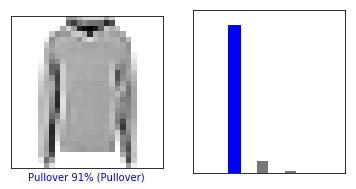

In [71]:
i = 3390
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

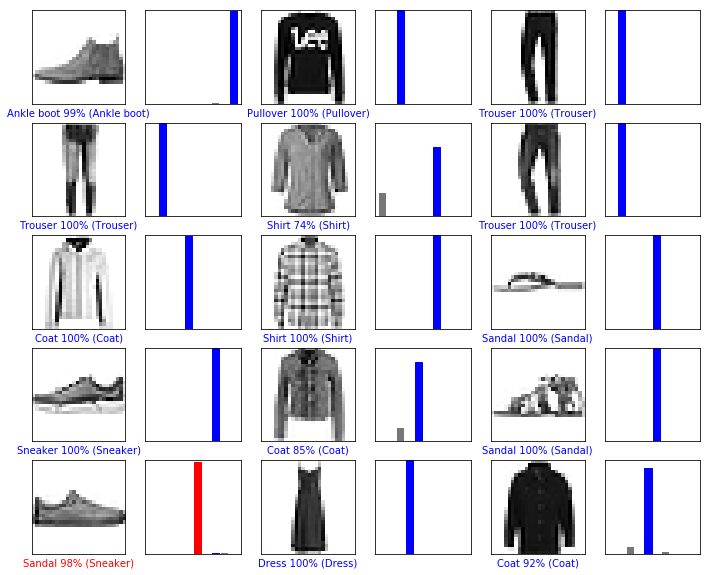

In [72]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()